In [1]:
import pandas as pd
data_pd = pd.read_csv('StreamingHistory_suj14.csv')

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

821

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0       La Quinta Estacion            119
1                Helloween            107
2               Bruno Mars             69
3                    Morat             68
4          Black Eyed Peas             62
5                 Coldplay             46
6  Destripando la Historia             44
7                    Leize             37
8                    Queen             34
9                Hombres G             33

<AxesSubplot:ylabel='Artist'>

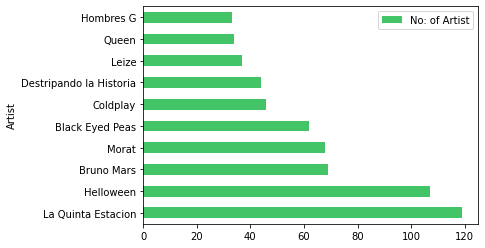

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')

In [5]:
df1_list = df1['Artist'].head(10).tolist()

In [6]:
print(df1_list)

['La Quinta Estacion', 'Helloween', 'Bruno Mars', 'Morat', 'Black Eyed Peas', 'Coldplay', 'Destripando la Historia', 'Leize', 'Queen', 'Hombres G']


In [7]:
import numpy as np
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['La Playa', 'Heal the World', 'Locked out of Heaven', 'Pan y mantequilla', 'Blow Me (One Last Kiss)', 'So What', 'Tres Gotas De Agua Bendita', 'Como Yo', 'La Llave De Mi Corazon', 'Me Enamoro de Ella', 'Clavado En Un Bar', 'Happy - From "Despicable Me 2"', 'Locked out of Heaven', 'Sugar', 'Uptown Funk (feat. Bruno Mars)', 'CAN\'T STOP THE FEELING! (Original Song from DreamWorks Animation\'s "TROLLS")', 'A Sky Full of Stars', 'Best Day Of My Life', 'Blurred Lines', 'Treasure', 'Cheerleader - Felix Jaehn Remix Radio Edit', 'Marvin Gaye (feat. Meghan Trainor)', 'Señorita', 'Perfect Strangers', 'Anywhere', 'Something Just Like This', 'Happy Kids', 'What A Man Gotta Do', 'We Can Do Better', "There's Nothing Holdin' Me Back", 'Can You Feel It', "I Don't Care (with Justin Bieber)", 'ME! (feat. Brendon Urie of Panic! At The Disco)', 'Girls Like You (feat. Cardi B)', 'Forever Young', 'Never Really Over', 'Perfect (feat. Haris)', 'Sucker', 'Galway Girl', 'All Star', 'Stitches', 'Let It Be Me', 

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['0jeS8PyyIRAG0A3t5DtL71', '7woW97CfcWaKtuC6W5BP2K', '3w3y8KPTfNeOKPiqUTakBh', '2kZJ5wrpq1gCdHmVEjahoH', '4k80K0b6KZ2QjAYkXON7q6', '0JiY190vktuhSGN6aqJdrt', '0uuw5iDAOlc0lr6Bco629e', '6g9QI7aDG8erPWyAzII9b6', '5rfE1f8Upv16wrB1KM1DBn', '2r9sa01fZW9NEVwdqFvfzZ', '78DVpEWwmJFC25KGz8fJuE', '60nZcImufyMA1MKQY3dcCH', '3w3y8KPTfNeOKPiqUTakBh', '2rIacF3N2AwIH46Asnj7E7', '32OlwWuMpZ6b0aN2RZOeMS', '6JV2JOEocMgcZxYSZelKcc', '0FDzzruyVECATHXKHFs9eJ', '5Hroj5K7vLpIG4FNCRIjbP', '0n4bITAu0Y0nigrz3MFJMb', '55h7vJchibLdUkxdlX3fK7', '7vFoFDWqTX0mHzLfrF1Cfy', '6ukMqDxnOPOgoHdak7Kyp3', '6FNTdTRIscchi5lg6SA0I1', '3P3pw6C19j31Rnzgo3JG7o', '7EI6Iki24tBHAMxtb4xQN2', '6RUKPb4LETWmmr3iAEQktW', '3nVJ4tGeLFR6HUiz3e7qAe', '4wNIkl5XGiAACjFBlDWuSd', '1swaftqa6ahRIFf9E48FlN', '6ixSZFUBSanvSiGQmCgiQR', '6rC55vFj1dBuxN5zjuOIF1', '3HVWdVOQ0ZA45FuZGSfvns', '2Rk4JlNc2TPmZe2af99d45', '6FRLCMO5TUHTexlWo8ym1W', '4S1VYqwfkLit9mKVY3MXoo', '5PYQUBXc7NYeI1obMKSJK0', '30cW9fD87IgbYFl8o0lUze', '22vgEDb5hykfaTwLuskFGD', '0afhq8XCEx

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

1990


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████| 1990/1990 [04:51<00:00,  6.84it/s]


In [16]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [17]:
TrackIDs_StillNotParsed [:10]

[]

In [18]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [19]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  0jeS8PyyIRAG0A3t5DtL71   0.683    0.1070  140.108       0.1500   
1  7woW97CfcWaKtuC6W5BP2K   0.485    0.1040   80.948       0.0485   
2  3w3y8KPTfNeOKPiqUTakBh   0.698    0.3090  143.994       0.0431   
3  2kZJ5wrpq1gCdHmVEjahoH   0.826    0.0813   99.997       0.0420   
4  4k80K0b6KZ2QjAYkXON7q6   0.919    0.2820  113.987       0.0440   

   acousticness  instrumentalness  time_signature  danceability  key  \
0      0.108000          0.000000               4         0.796   10   
1      0.537000          0.000002               4         0.545    9   
2      0.049000          0.000000               4         0.726    5   
3      0.238000          0.000000               4         0.698   10   
4      0.000145          0.000000               4         0.597    7   

   duration_ms  loudness  valence  mode                             track_uri  
0       207731    -2.754    0.353     0  spotify:track:0jeS8PyyIRAG0A3t5DtL71  
1       384307    -8.045    0.101     1  spotify:track:7woW97CfcWaKtuC6W5BP2K  
2       233478    -4.165    0.867     1  spotify:track:3w3y8KPTfNeOKPiqUTakBh  
3       202147    -5.039    0.910     1  spotify:track:2kZJ5wrpq1gCdHmVEjahoH  
4       255587    -2.954    0.730     1  spotify:track:4k80K0b6KZ2QjAYkXON7q6

In [20]:
audioFeaturesDF_AllTracks.shape

(1990, 15)

In [21]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks.csv")

In [22]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks.csv").drop(["Unnamed: 0"], axis = 1)

In [23]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   0jeS8PyyIRAG0A3t5DtL71   0.683    0.1070  140.108       0.1500   
1   7woW97CfcWaKtuC6W5BP2K   0.485    0.1040   80.948       0.0485   
2   3w3y8KPTfNeOKPiqUTakBh   0.698    0.3090  143.994       0.0431   
3   2kZJ5wrpq1gCdHmVEjahoH   0.826    0.0813   99.997       0.0420   
4   4k80K0b6KZ2QjAYkXON7q6   0.919    0.2820  113.987       0.0440   
5   0JiY190vktuhSGN6aqJdrt   0.870    0.2410  126.019       0.0425   
6   0uuw5iDAOlc0lr6Bco629e   0.793    0.0508  110.127       0.0482   
7   6g9QI7aDG8erPWyAzII9b6   0.858    0.0884  129.966       0.0683   
8   5rfE1f8Upv16wrB1KM1DBn   0.745    0.0442  159.767       0.1900   
9   2r9sa01fZW9NEVwdqFvfzZ   0.850    0.1320  137.791       0.0400   
10  78DVpEWwmJFC25KGz8fJuE   0.854    0.0664  148.003       0.0369   
11  60nZcImufyMA1MKQY3dcCH   0.822    0.0908  160.019       0.1830   
12  3w3y8KPTfNeOKPiqUTakBh   0.698    0.3090  143.994       0.0431   
13  2rIacF3N2AwIH46Asnj7E7   0.786    0.0878  120.068       0.0337   
14  32OlwWuMpZ6b0aN2RZOeMS   0.609    0.0344  114.988       0.0824   
15  6JV2JOEocMgcZxYSZelKcc   0.830    0.1910  113.030       0.0749   
16  0FDzzruyVECATHXKHFs9eJ   0.675    0.2090  124.970       0.0279   
17  5Hroj5K7vLpIG4FNCRIjbP   0.902    0.0558  100.012       0.0346   
18  0n4bITAu0Y0nigrz3MFJMb   0.599    0.0759  119.993       0.0411   
19  55h7vJchibLdUkxdlX3fK7   0.692    0.3240  116.017       0.0431   

    acousticness  instrumentalness  time_signature  danceability  key  \
0       0.108000          0.000000               4         0.796   10   
1       0.537000          0.000002               4         0.545    9   
2       0.049000          0.000000               4         0.726    5   
3       0.238000          0.000000               4         0.698   10   
4       0.000145          0.000000               4         0.597    7   
5       0.000329          0.000000               4         0.534   11   
6       0.093600          0.000000               4         0.778    0   
7       0.349000          0.000000               4         0.641    6   
8       0.599000          0.000000               4         0.770    9   
9       0.702000          0.000000               4         0.586    7   
10      0.007370          0.000002               4         0.634   11   
11      0.219000          0.000000               4         0.647    5   
12      0.049000          0.000000               4         0.726    5   
13      0.074700          0.000000               4         0.729    1   
14      0.008010          0.000082               4         0.856    0   
15      0.012300          0.000000               4         0.667    0   
16      0.006170          0.001970               4         0.545    6   
17      0.059100          0.000262               4         0.673    2   
18      0.003340          0.000008               4         0.853    7   
19      0.041200          0.000072               4         0.874    5   

    duration_ms  loudness  valence  mode                             track_uri  
0        207731    -2.754    0.353     0  spotify:track:0jeS8PyyIRAG0A3t5DtL71  
1        384307    -8.045    0.101     1  spotify:track:7woW97CfcWaKtuC6W5BP2K  
2        233478    -4.165    0.867     1  spotify:track:3w3y8KPTfNeOKPiqUTakBh  
3        202147    -5.039    0.910     1  spotify:track:2kZJ5wrpq1gCdHmVEjahoH  
4        255587    -2.954    0.730     1  spotify:track:4k80K0b6KZ2QjAYkXON7q6  
5        215160    -3.078    0.462     0  spotify:track:0JiY190vktuhSGN6aqJdrt  
6        255747    -4.013    0.888     1  spotify:track:0uuw5iDAOlc0lr6Bco629e  
7        192147    -6.304    0.931     1  spotify:track:6g9QI7aDG8erPWyAzII9b6  
8        195560    -2.416    0.964     0  spotify:track:5rfE1f8Upv16wrB1KM1DBn  
9        257267    -8.623    0.964     1  spotify:track:2r9sa01fZW9NEVwdqFvfzZ  
10       310813    -3.444    0.564     1  spotify:track:78DVpEWwmJFC25KGz8fJuE  
11       232720    -4.662    0.962     0 